In [1]:
import pandas as pd
import numpy as np
import copy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate , train_test_split , StratifiedShuffleSplit
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit

from matplotlib import pyplot as plt
import seaborn as sns

# Загружаем исходные данные

In [2]:
train_directory = "data\train.csv"

train = pd.read_csv(r"C:\Course\xsolla\Test tasks\1. binary classification\data\train.csv", header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3222 non-null   int64  
 1   job             3222 non-null   object 
 2   marital         3222 non-null   object 
 3   education       3222 non-null   object 
 4   default         3222 non-null   object 
 5   housing         3222 non-null   object 
 6   loan            3222 non-null   object 
 7   contact         3222 non-null   object 
 8   month           3222 non-null   object 
 9   day_of_week     3222 non-null   object 
 10  duration        3222 non-null   int64  
 11  campaign        3222 non-null   int64  
 12  pdays           3222 non-null   int64  
 13  previous        3222 non-null   int64  
 14  poutcome        3222 non-null   object 
 15  emp.var.rate    3222 non-null   float64
 16  cons.price.idx  3222 non-null   float64
 17  cons.conf.idx   3222 non-null   f

# Выбираем переменные для модели
# Графики полей
Выбираем те, где есть разница по целевой переменной.

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


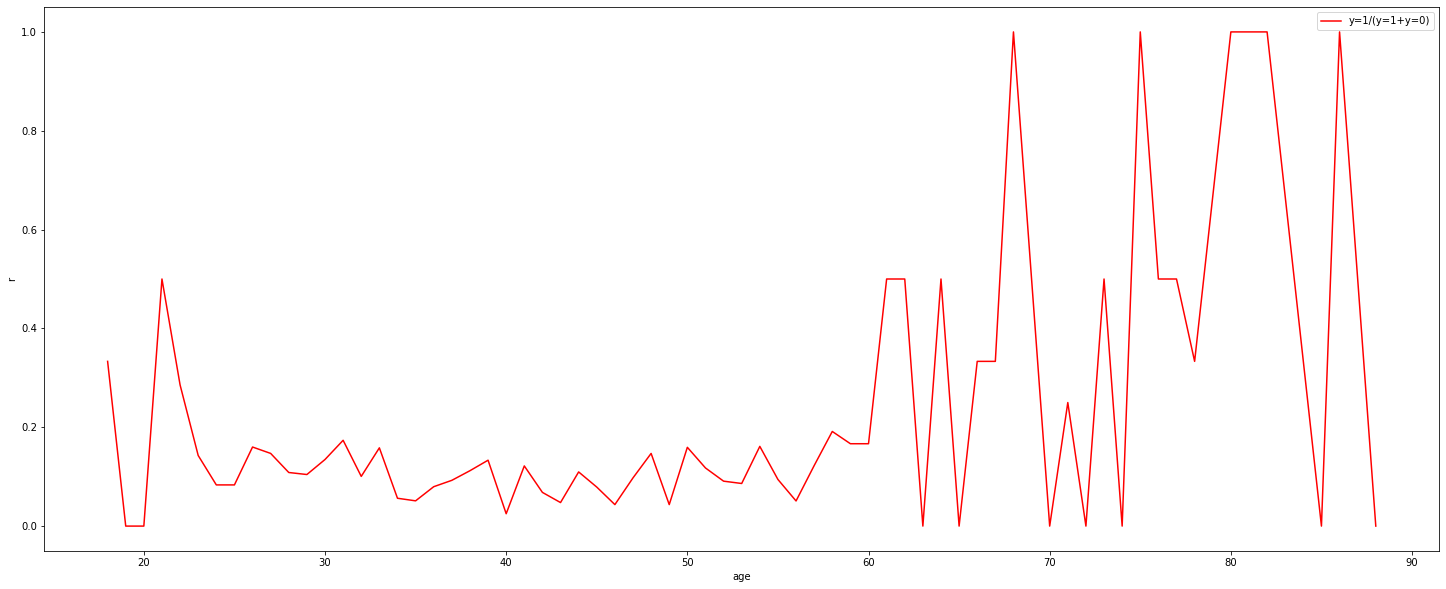

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


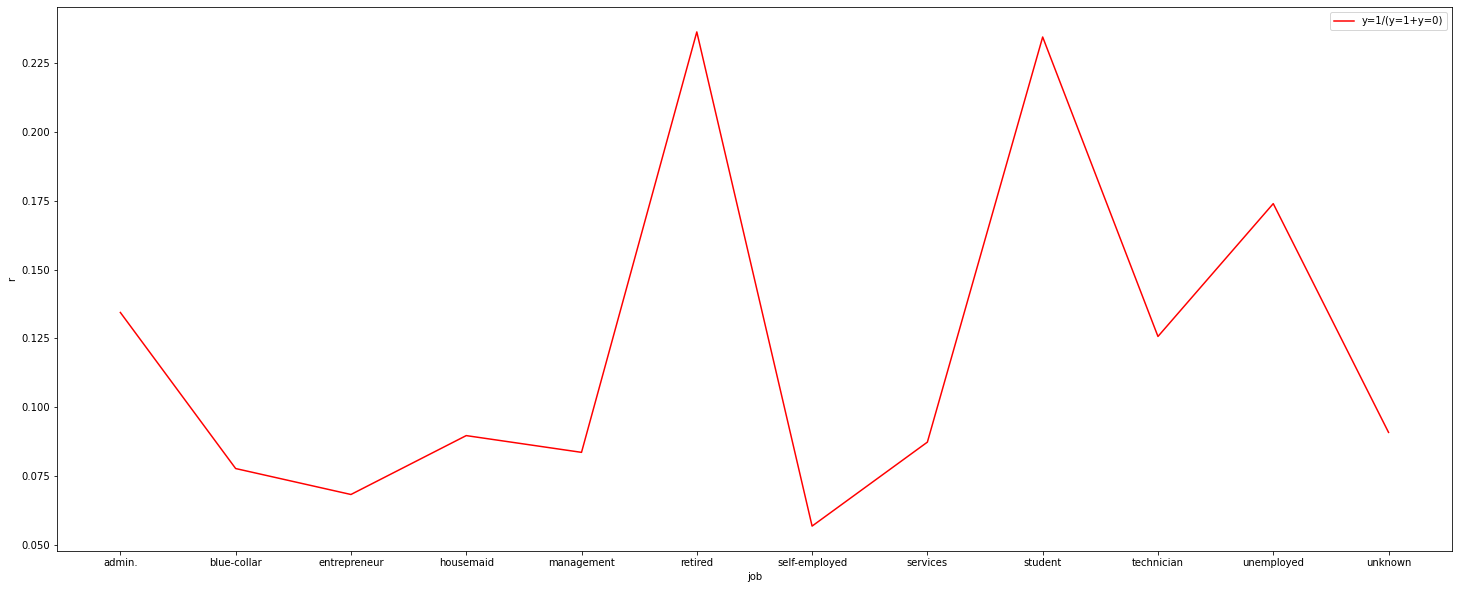

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


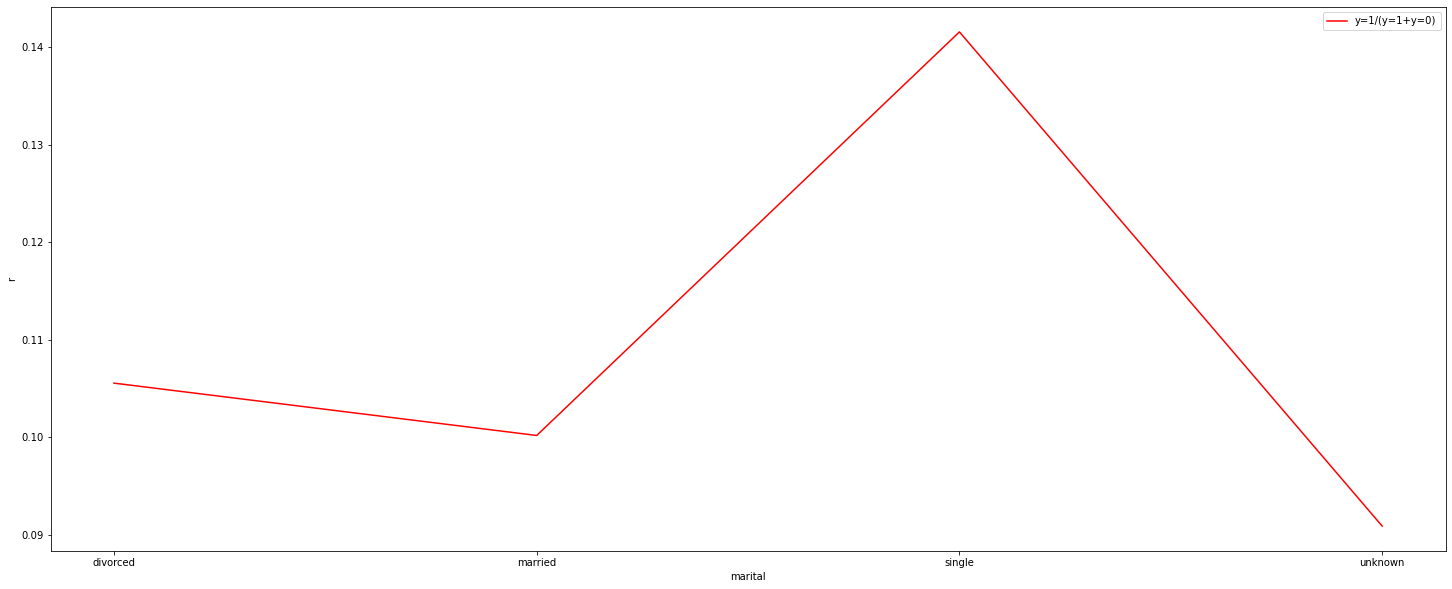

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


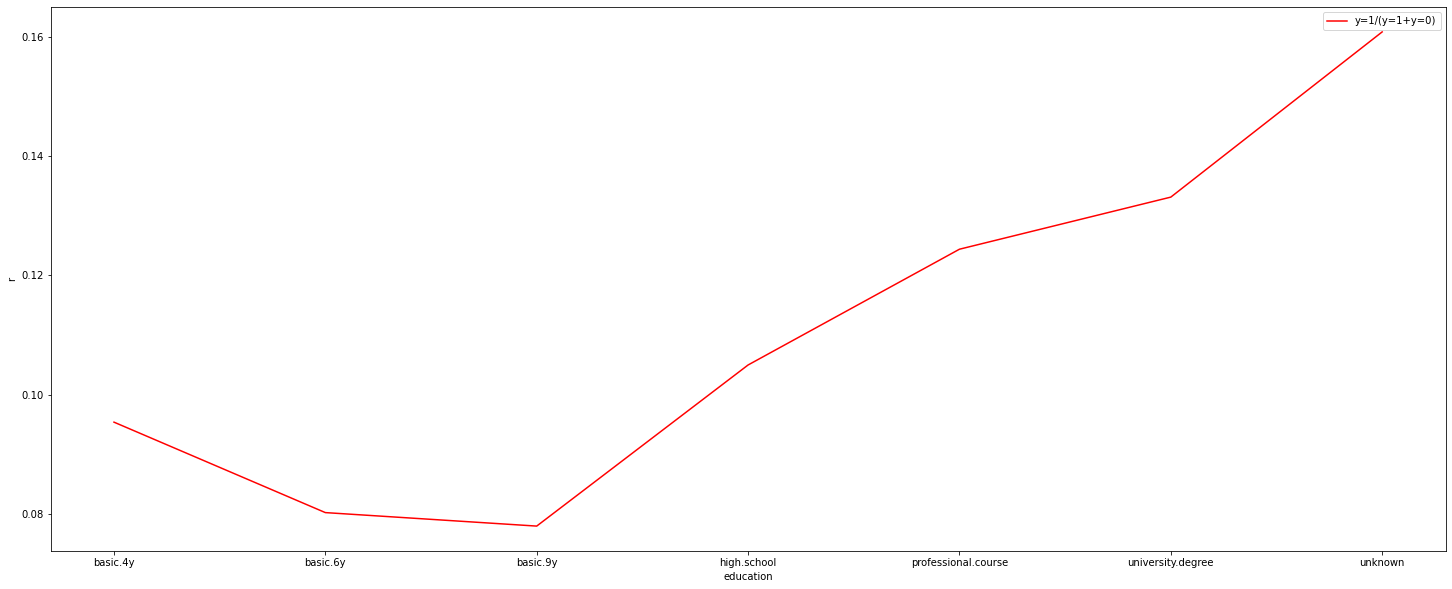

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


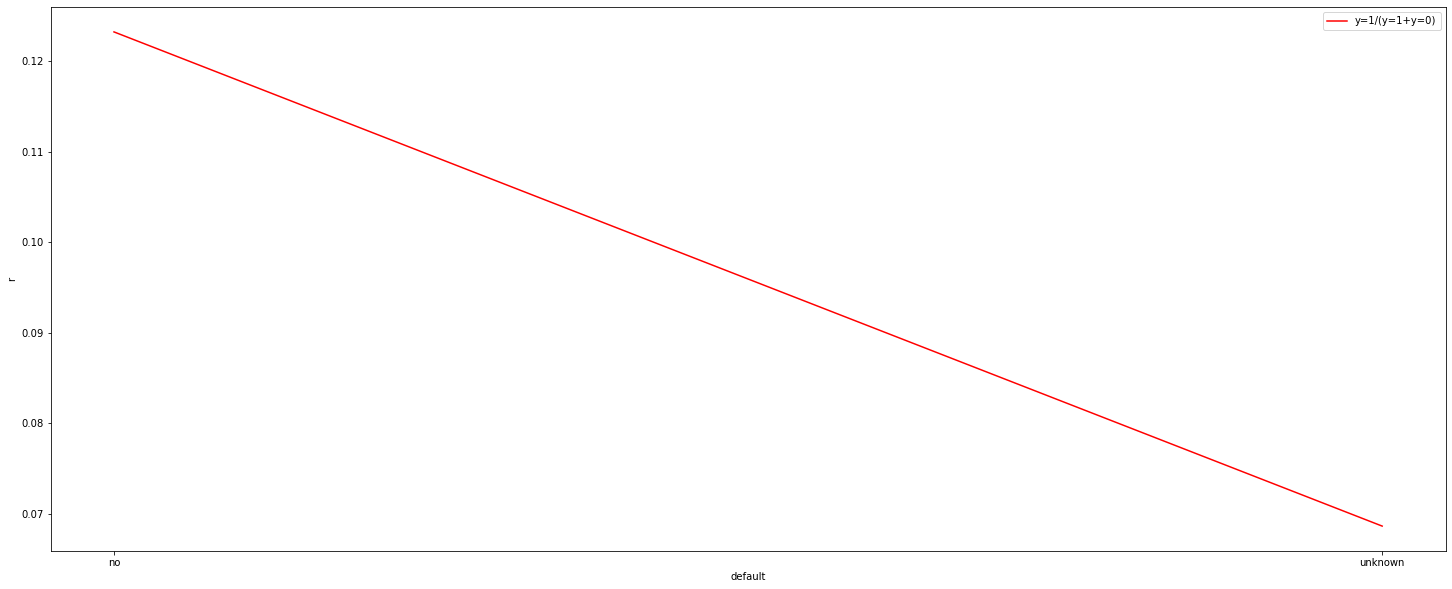

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


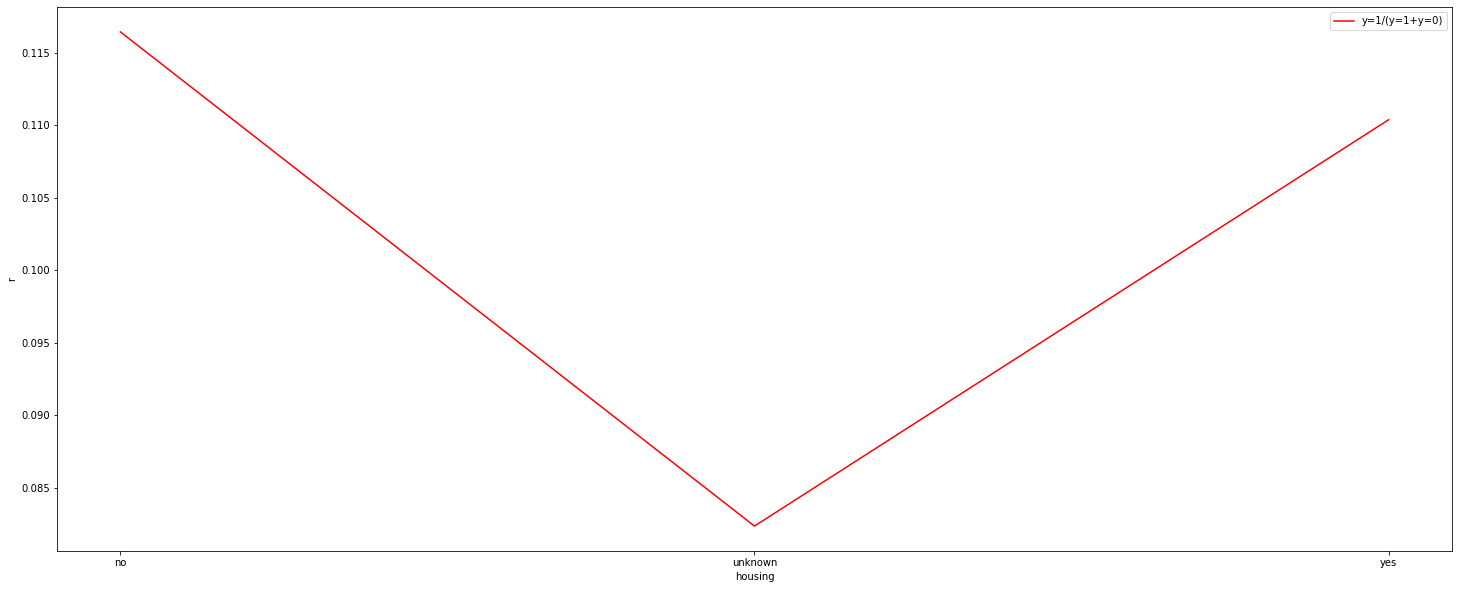

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


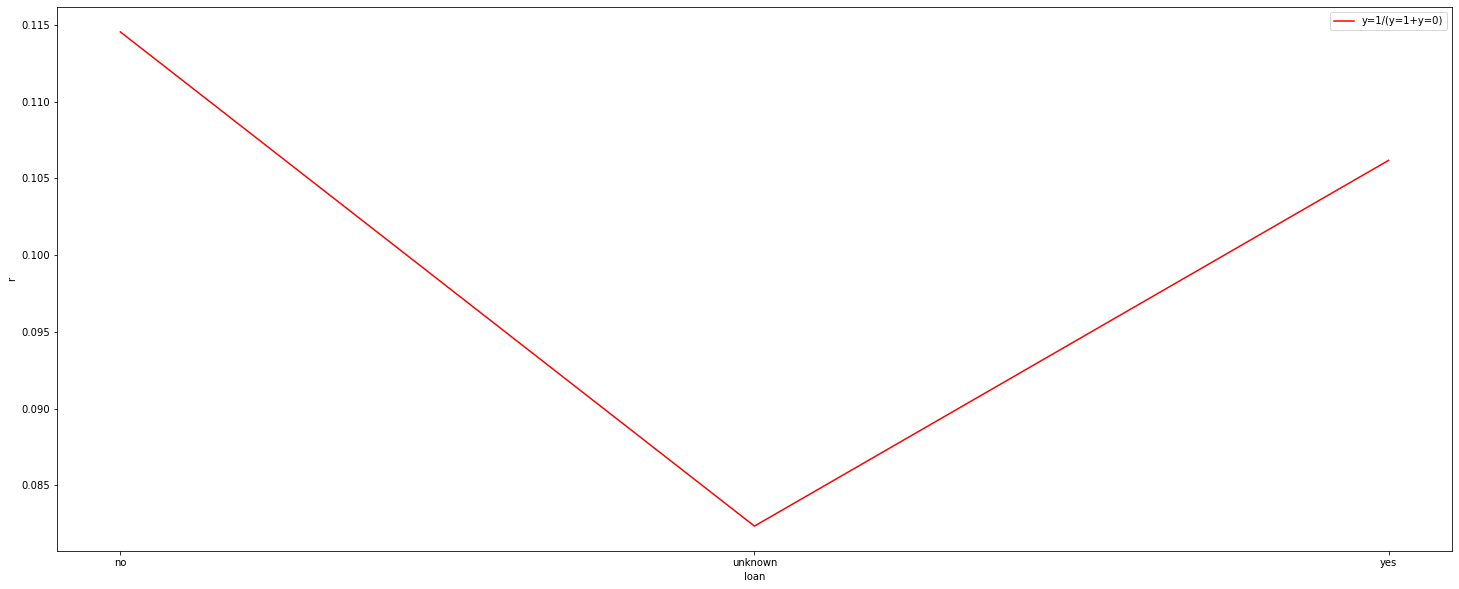

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


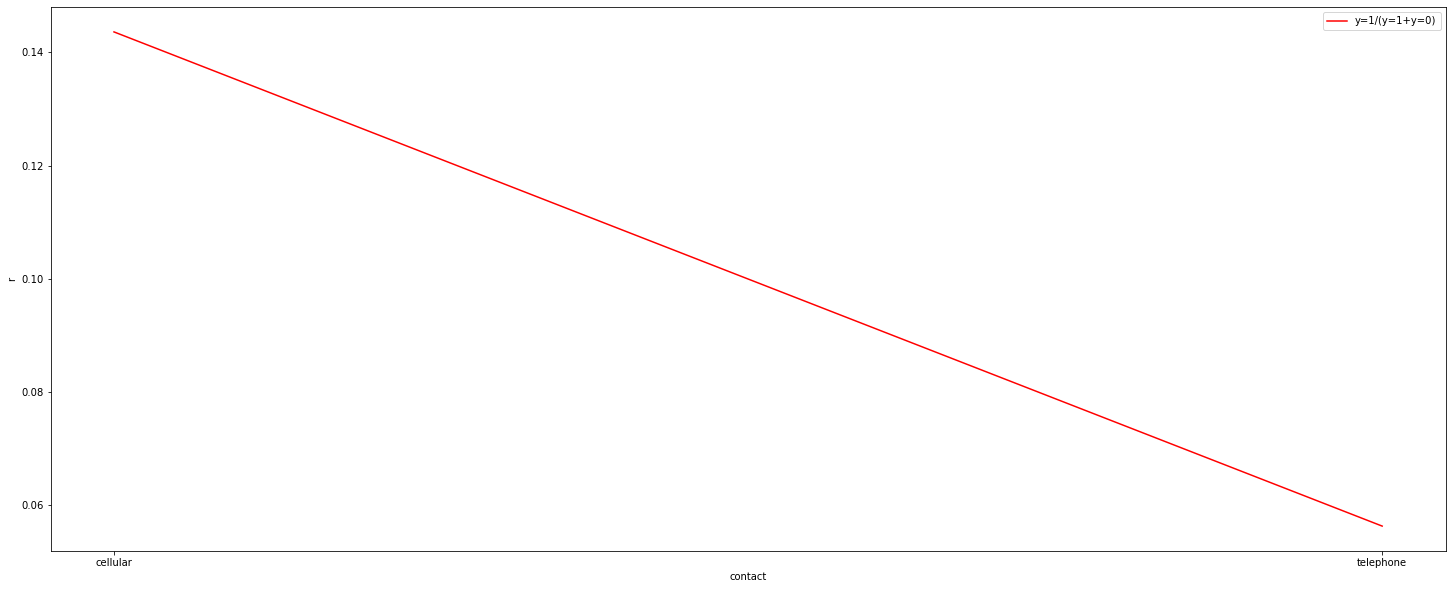

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


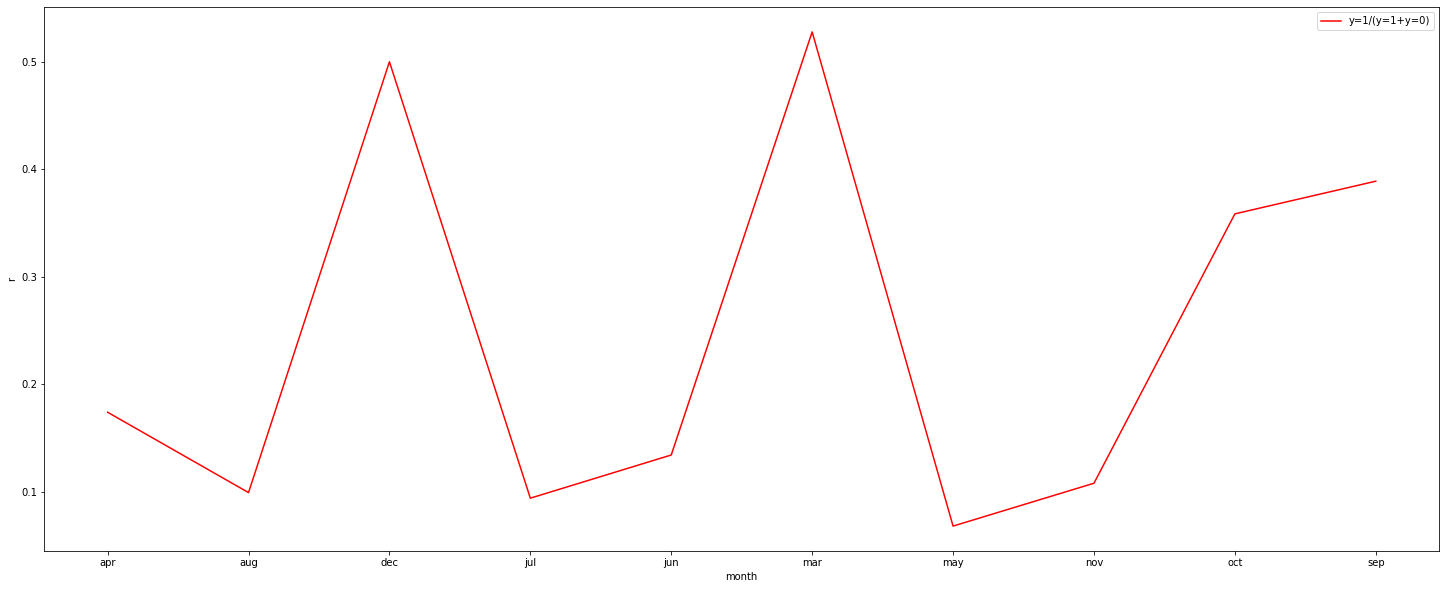

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


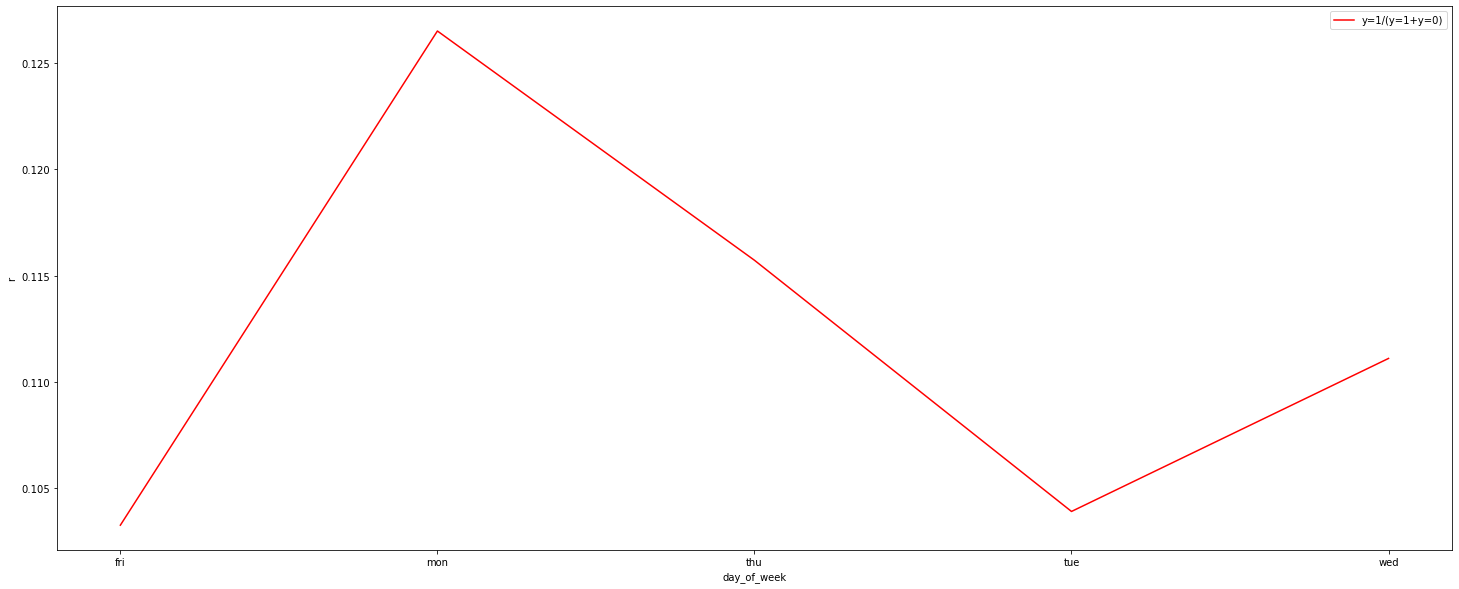

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


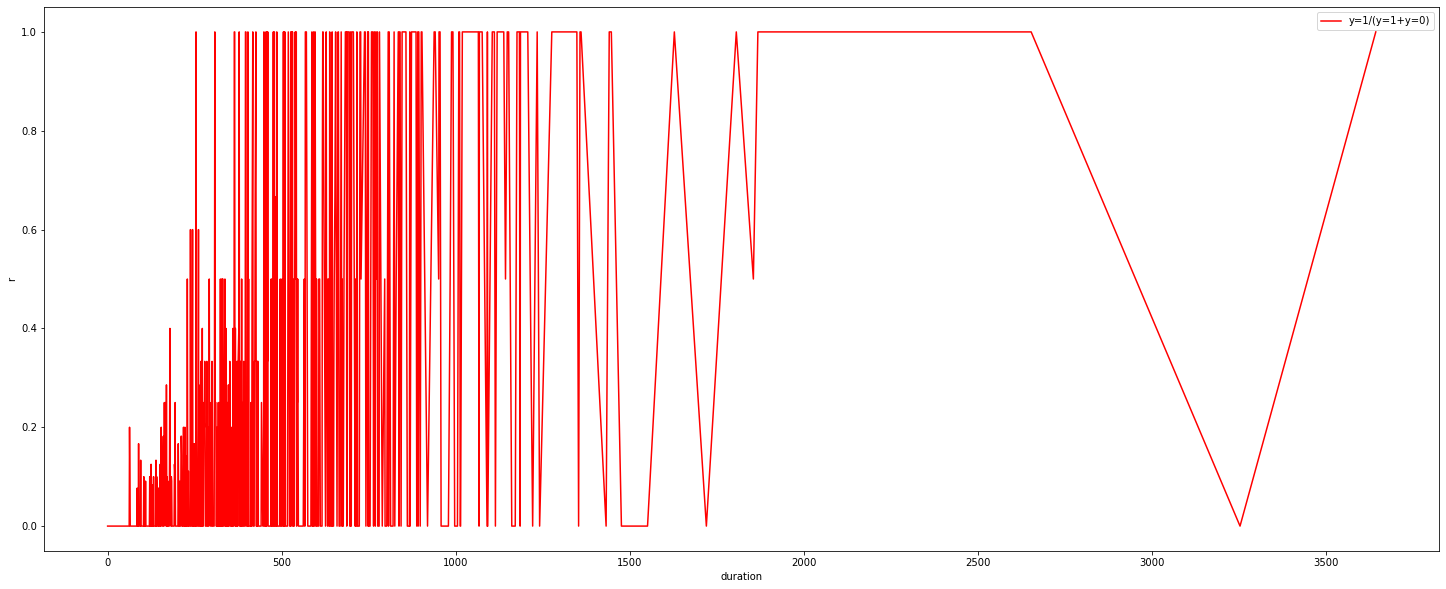

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


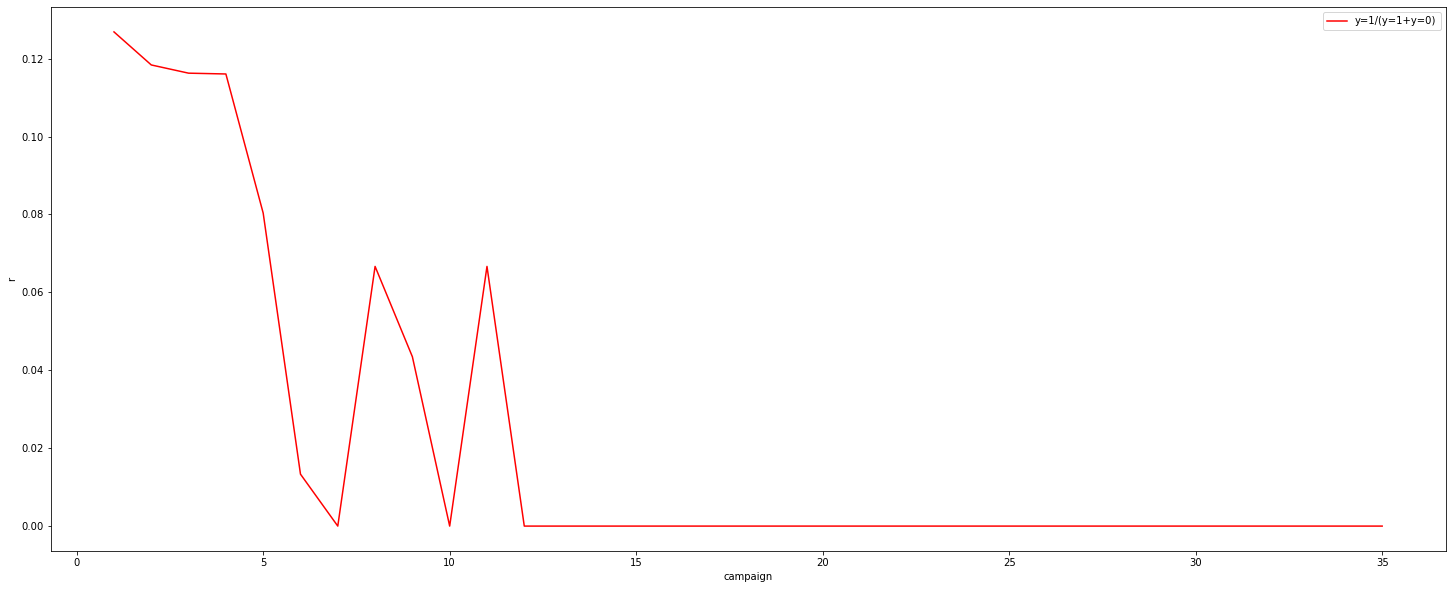

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


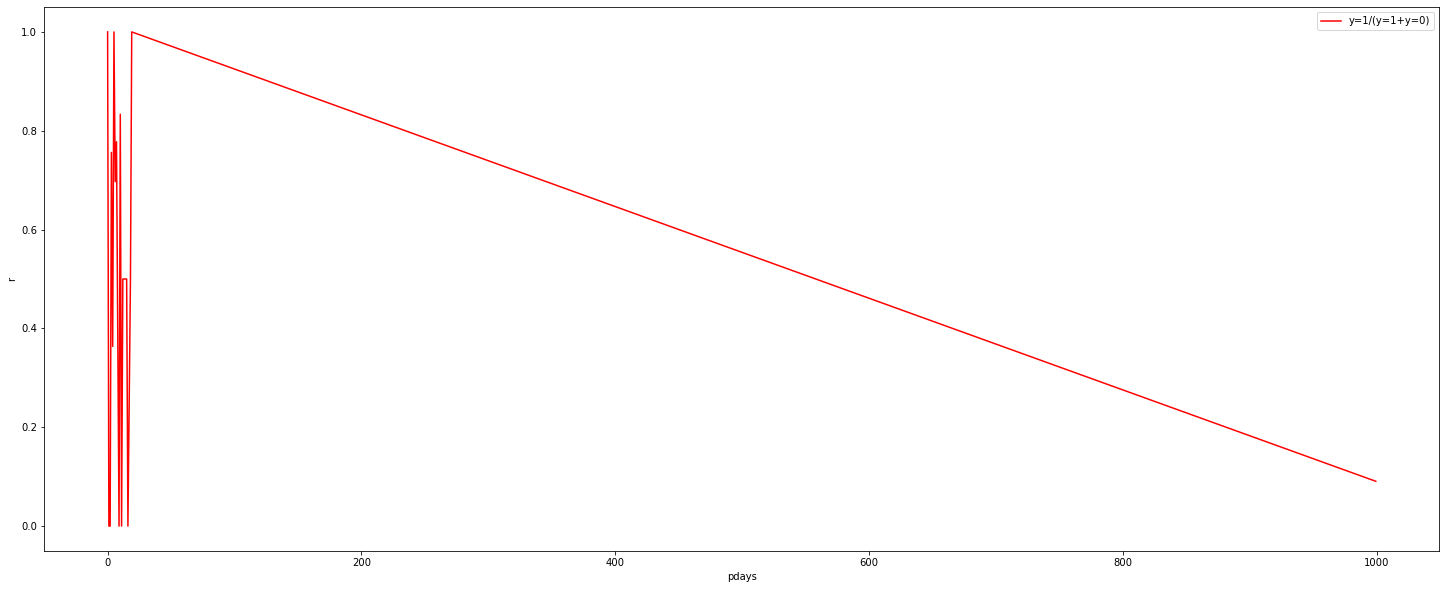

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


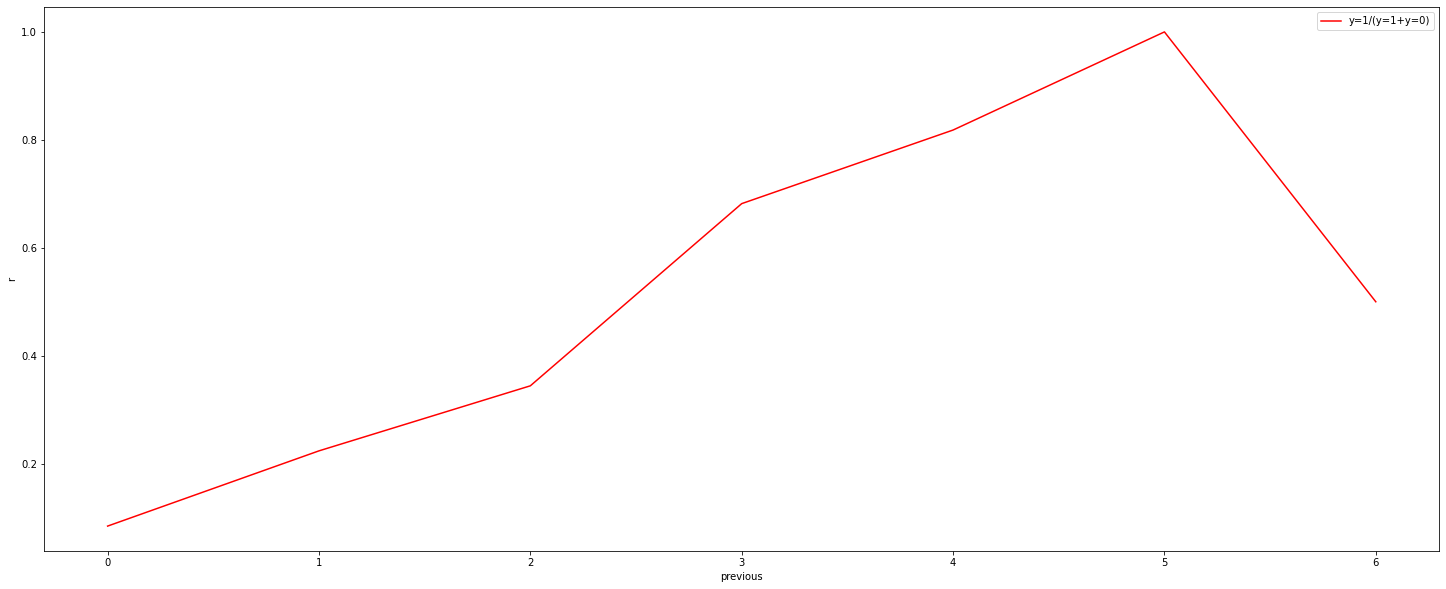

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


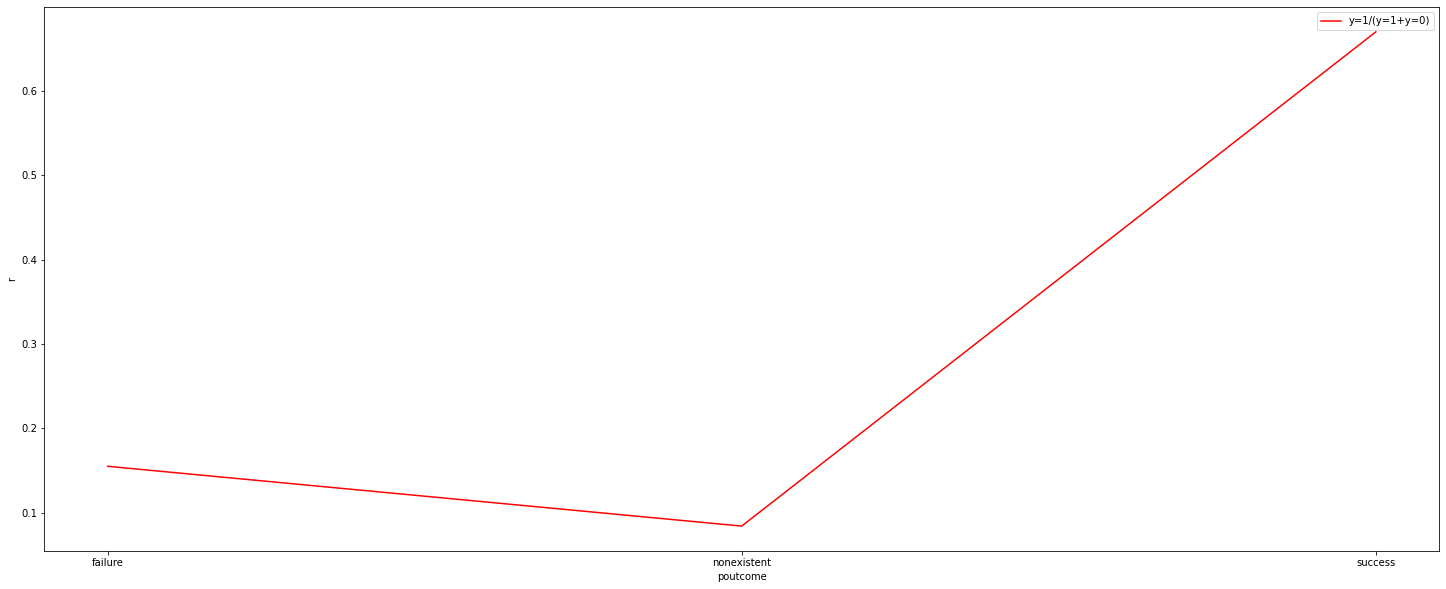

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


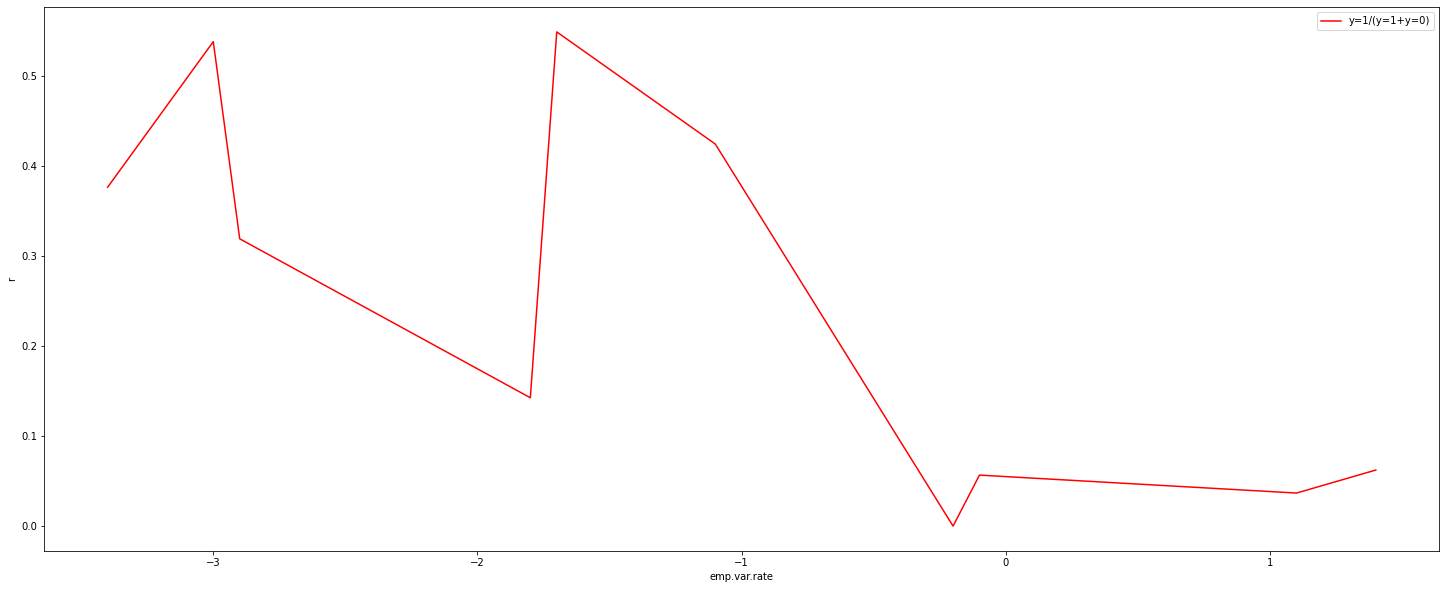

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


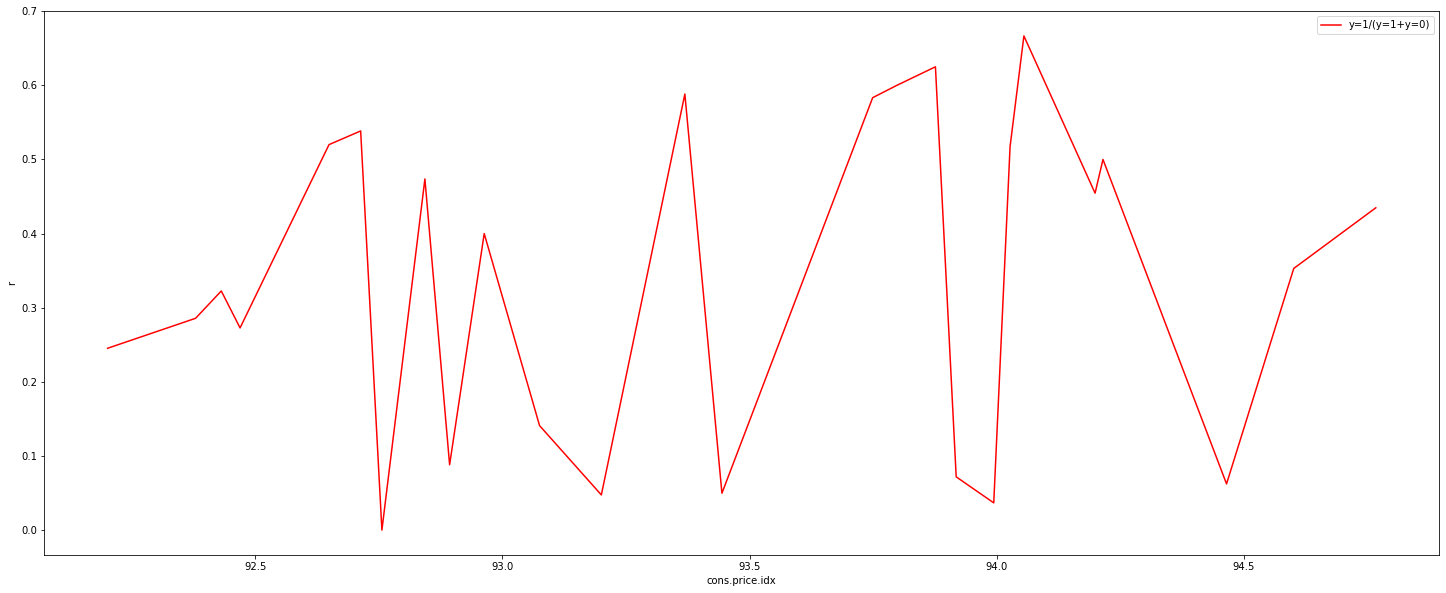

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


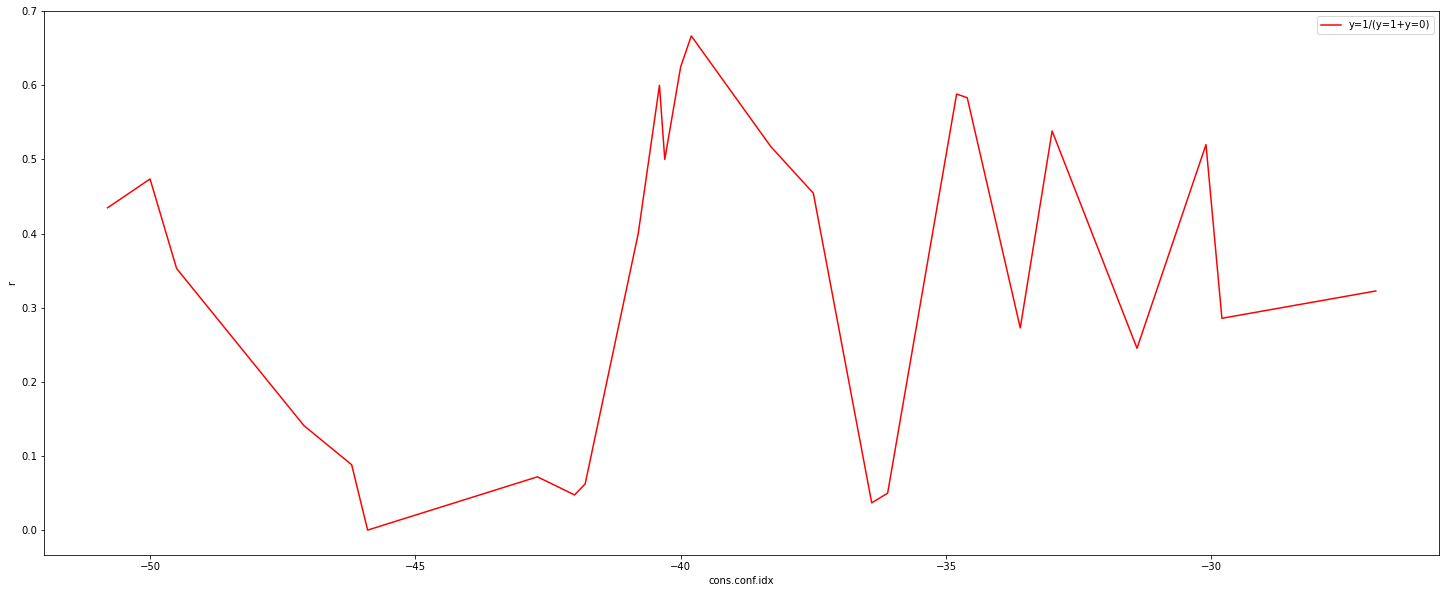

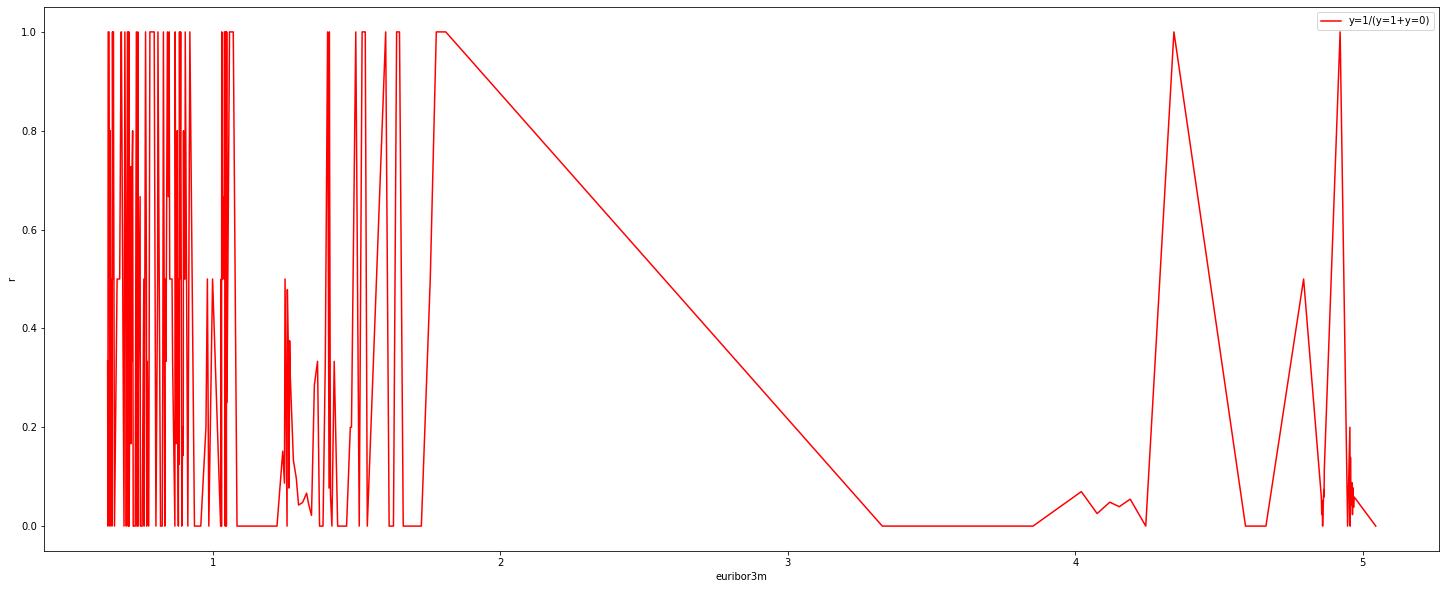

C:\Games\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


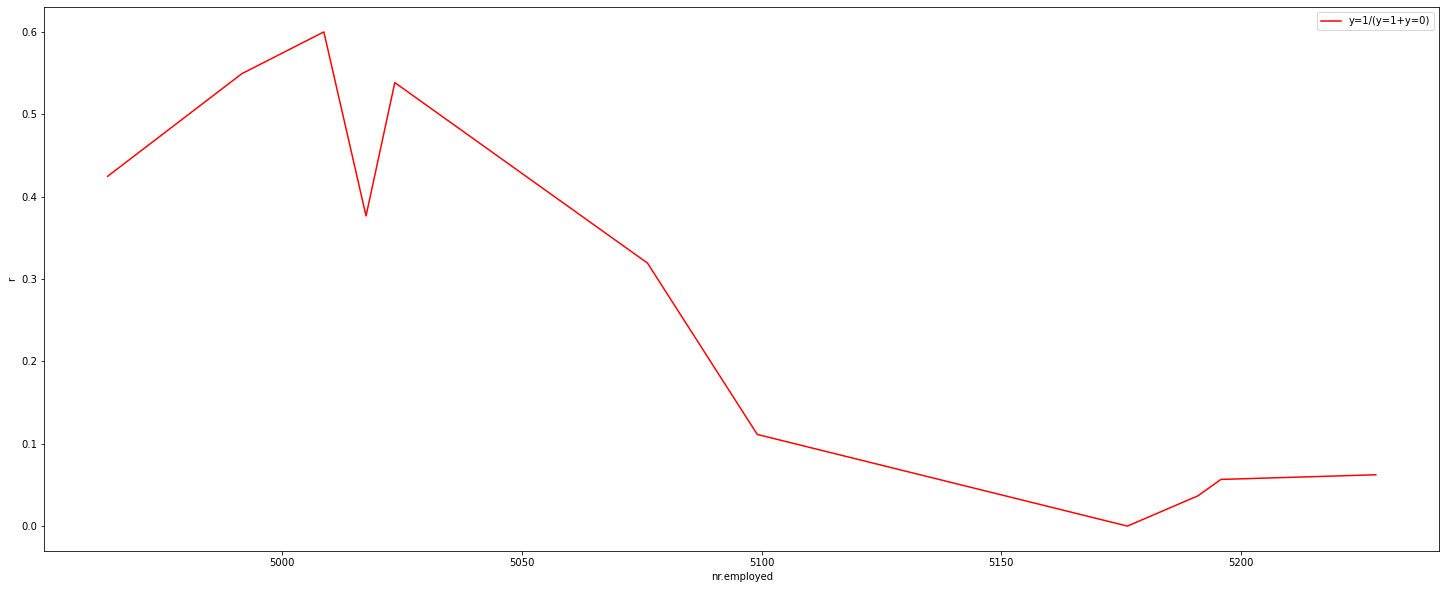

In [3]:
for i in train.columns:
    try:
        fig, ax = plt.subplots(figsize=(25,10))
        temp1 = train[train.y == 1].groupby([i]).count().reset_index(drop=False)[[f'{i}','y']].merge(train[train.y == 0].groupby([i]).count().reset_index(drop=False)[[f'{i}','y']], on=i, how='outer').fillna(int(0))
        temp1['r'] = np.nan
        for j in temp1.index:
            if temp1.y_y.iloc[j] > float(0.2):
                temp1['r'].iloc[j] = temp1.y_x.iloc[j] / (temp1.y_x.iloc[j]+temp1.y_y.iloc[j])
            else:
                temp1['r'].iloc[j] = int(1)        
        sns.lineplot(x=temp1[i], y=temp1['r'], color='r', label='y=1/(y=1+y=0)')        
        plt.show()
    except:
        pass
plt.close('all')

## Переводим качественные признаки в количественные
Для расчётов

In [4]:
def convert_job(job_name):
    if job_name not in [-1,0,1,2,3,4]:
        if job_name == 'unemployed':
            return int(0)
        elif job_name in ('retired', 'student'):
            return int(4)
        elif job_name == 'housemaid':
            return int(3)
        elif job_name in ('blue-collar', 'services', 'entrepreneur','self-employed', 'management'):
            return int(1)
        elif job_name in ('technician', 'admin.'):
            return int(2)
        else:
            return int(-1)
    else:
        return job_name
def df_convert_job(df):
    df['job_name'] = df.apply(lambda row: convert_job(row.job), axis=1)
    return df

def convert_marital(marital_name):
    if marital_name not in [-1,0,1,2,3]:
        if marital_name == 'unknown':
            return int(0)
        elif marital_name == 'single':
            return int(3)
        elif marital_name == 'divorced':
            return int(2)
        elif marital_name == 'married':
            return int(1)
        else:
            return int(-1)
    else:
        return marital_name
def df_convert_marital(df):
    df['marital_name'] = df.apply(lambda row: convert_marital(row.marital), axis=1)
    return df


def convert_education(education_name):
    if education_name not in [-1,0,1,2,3]:
        if education_name == 'unknown':
            return int(0)
        elif education_name in ('basic.6y', 'basic.4y', 'basic.9y'):
            return int(1)
        elif education_name == 'high.school':
            return int(2)
        elif education_name == 'professional.course':
            return int(3)
        elif education_name == 'university.degree':
            return int(4)
        else:
            return int(-1)
    else:
        return education_name
def df_convert_education(df):
    df['education_name'] = df.apply(lambda row: convert_education(row.education), axis=1)
    return df

def convert_default(default_name):
    if default_name not in [-1,0,1]:
        if default_name == 'unknown':
            return int(0)
        elif default_name == 'no':
            return int(1)
        else:
            return int(-1)
    else:
        return default_name
def df_convert_default(df):
    df['default_name'] = df.apply(lambda row: convert_default(row.default), axis=1)
    return df

def convert_housing(housing_name):
    if housing_name not in [-1,0,1,2]:
        if housing_name == 'unknown':
            return int(0)
        elif housing_name == 'no':
            return int(1)
        elif housing_name == 'yes':
            return int(2)
        else:
            return int(-1)
    else:
        return housing_name
def df_convert_housing(df):
    df['housing_name'] = df.apply(lambda row: convert_housing(row.housing), axis=1)
    return df

def convert_loan(loan_name):
    if loan_name not in [-1,0,1,2]:
        if loan_name == 'unknown':
            return int(0)
        elif loan_name == 'no':
            return int(1)
        elif loan_name == 'yes':
            return int(2)
        else:
            return int(-1)
    else:
        return loan_name
def df_convert_loan(df):
    df['loan_name'] = df.apply(lambda row: convert_loan(row.loan), axis=1)
    return df

def convert_contact(contact_name):
    if contact_name not in [-1,0,1,2]:
        if contact_name == 'unknown':
            return int(0)
        elif contact_name == 'no':
            return int(1)
        elif contact_name == 'yes':
            return int(2)
        else:
            return int(-1)
    else:
        return contact_name
def df_convert_contact(df):
    df['contact_name'] = df.apply(lambda row: convert_contact(row.contact), axis=1)
    return df


def convert_month(month_name):
    if month_name not in [-1,0,1,2,3,4,5,6,7,8,9,10,11,12]:
        if month_name == 'unknown':
            return int(0)
        elif month_name == 'jan':
            return int(1)
        elif month_name == 'feb':
            return int(2)
        elif month_name == 'mar':
            return int(3)
        elif month_name == 'apr':
            return int(4)
        elif month_name == 'may':
            return int(5)
        elif month_name == 'jun':
            return int(6)
        elif month_name == 'jul':
            return int(7)
        elif month_name == 'aug':
            return int(8)
        elif month_name == 'sep':
            return int(9)
        elif month_name == 'oct':
            return int(10)
        elif month_name == 'nov':
            return int(11)
        elif month_name == 'dec':
            return int(12)
        else:
            return int(-1)
    else:
        return month_name
def df_convert_month(df):
    df['month_name'] = df.apply(lambda row: convert_month(row.month), axis=1)
    return df

def convert_day_of_week(day_of_week_name):
    if day_of_week_name not in [-1,0,1,2,3,4,5]:
        if day_of_week_name == 'unknown':
            return int(0)
        elif day_of_week_name == 'mon':
            return int(1)
        elif day_of_week_name == 'thu':
            return int(2)
        elif day_of_week_name == 'wed':
            return int(3)
        elif day_of_week_name == 'tue':
            return int(4)
        elif day_of_week_name == 'fri':
            return int(5)
        else:
            return int(-1)
    else:
        return day_of_week_name
def df_convert_day_of_week(df):
    df['day_of_week_name'] = df.apply(lambda row: convert_day_of_week(row.day_of_week), axis=1)
    return df

def convert_poutcome(poutcome_name):
    if poutcome_name not in [-1,0,1,2,3]:
        if poutcome_name == 'nonexistent':
            return int(0)
        elif poutcome_name == 'failure':
            return int(1)
        elif poutcome_name == 'success':
            return int(2)
        else:
            return int(-1)
    else:
        return poutcome_name
def df_convert_poutcome(df):
    df['poutcome_name'] = df.apply(lambda row: convert_poutcome(row.poutcome), axis=1)
    return df

train = df_convert_job(train) 
train = df_convert_marital(train) 
train = df_convert_education(train) 
train = df_convert_default(train) 
train = df_convert_housing(train)
train = df_convert_loan(train)
train = df_convert_contact(train)
train = df_convert_month(train)
train = df_convert_day_of_week(train)
train = df_convert_poutcome(train)

# Создаём модель
## Создание тренировочной и тестовой выборок

In [5]:
col_list = ['poutcome_name', 'duration', 'euribor3m', 'cons.conf.idx', 'loan_name', 'nr.employed', 'cons.price.idx', 'campaign']
X = train[col_list][:]
y = train['y'][:]
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)

##  Настройка классификатора

In [6]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=1) # 0.91, 0.90, 0.84
regressor.fit(train_data , train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##  Кросс-валидация

In [7]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

RFRegressor_sum = int(0)
for train_index, test_index in sss.split(test_data, test_labels):  
    RFRegressor_sum += metrics.roc_auc_score(test_labels.iloc[test_index], regressor.predict(test_data.iloc[test_index])) 
print(RFRegressor_sum / sss.get_n_splits())

0.9423819028609447


## Создаём модель математически
В итоге я решил оценить как можно больше комбинаций независимых переменных и выбрать лучшее.
Набор переменных в цикле: 
1. Начиная с каждой переменной
2. Добавляя к ней все переменные
3. Выбираем лучшую комбинацию

In [ ]:
par_list_0 = ['age' , 'job_name', 'marital_name', 'education_name', 'default_name', 'housing_name', 'loan_name', 
              'contact_name', 'month_name', 'day_of_week_name', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_name', 
              'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=1)
y = train['y'][:]
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
par_df = pd.DataFrame(columns=['parameters RFR', 'roc_auc'])


for ij in par_list_0:
    par_list_start = [ig]
    par_list = copy.deepcopy(par_list_start)
    par_roc_auc = int(0)
    d = int(1)
    dmax = int(1)
    while (d < 7) and (dmax < 100):
        temp_df = pd.DataFrame(columns=['var', 'mean'])
        for i in par_list_0:
            # находим рок_аук с добавлением новго параметра
            if i not in par_list:
                par_list_temp = copy.deepcopy(par_list)
                par_list_temp.append(i)
                X = train[par_list_temp][:]
                temp_mean = int(0)
                RFRegressor_sum_10 = int(0)
                for j in range(10):
                    train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)               
                    regressor.fit(train_data , train_labels)              
                    RFRegressor_sum = int(0)
                    for train_index, test_index in sss.split(test_data, test_labels):  
                        RFRegressor_sum += metrics.roc_auc_score(test_labels.iloc[test_index], regressor.predict(test_data.iloc[test_index])) 
                    RFRegressor_sum_10 += RFRegressor_sum / sss.get_n_splits()
                temp_mean = RFRegressor_sum_10 / int(10)
                # нашли и добавляем в дф с "параметр" - "рок_аук"
                temp_df = temp_df.append({'var': i, 'mean' : temp_mean}, ignore_index=True)
        # выбираем лучший следующий парамерт, с которым рок_аук больше
        try:
            par_best = temp_df.sort_values(axis=0, by=['mean'], ascending=False)['var'].to_list()[0]
            par_best_mean = temp_df.sort_values(axis=0, by=['mean'], ascending=False)['mean'].to_list()[0]
        except:
            par_best = par_list
            par_best_mean = int(0)
        # если лучший_новый параметр больше имеющегося    
        if par_best_mean > par_roc_auc:
            par_roc_auc = par_best_mean
            par_list.append(par_best)            
        else:
            d+=1 # лучшего не найдено столько-то раз т.к. в разбиении есть рандом
        dmax+=1 # просто ограничение на всякий случай
    par_df = par_df.append({'parameters RFR': par_list, 'roc_auc' : par_roc_auc}, ignore_index=True) # добавляем лучший список параметров для расчётов начиная с ij

In [ ]:
par_df.to_excel(r'C:\Course\xsolla\Test tasks\1. binary classification\search_parameters RFR5.xlsx', sheet_name='Лист 1')

### Покажем пример таблицы для демонстрации

In [8]:
pd.read_excel(r'C:\Course\xsolla\Test tasks\1. binary classification\search_parameters RFR5.xlsx', sheet_name='Лист 1')

,Unnamed: 0,parameters RFR,roc_auc
0,0,"['poutcome_name', 'duration', 'nr.employed', '...",0.943297
1,1,"['poutcome_name', 'duration', 'nr.employed', '...",0.943415
2,2,"['poutcome_name', 'duration', 'nr.employed', '...",0.944539
3,3,"['poutcome_name', 'duration', 'nr.employed', '...",0.938758
4,4,"['poutcome_name', 'duration', 'nr.employed', '...",0.942341
5,5,"['poutcome_name', 'duration', 'euribor3m', 'pr...",0.942077
6,6,"['poutcome_name', 'duration', 'euribor3m', 'em...",0.943300
7,7,"['poutcome_name', 'duration', 'emp.var.rate', ...",0.942042
8,8,"['poutcome_name', 'duration', 'euribor3m', 'co...",0.944811
9,9,"['poutcome_name', 'duration', 'nr.employed', '...",0.943615


### 3-5 действий по итогу оценки качества, которые Вы бы сделали для улучшения качества модели, если бы Вам дали на работу еще 5 рабочих дней. 

1. Предобработка данных. Более полная.
2. Бизнес-аналитика признаков, более обонованный выбор независимых переменных. В датафрейме есть несколько близких списков парметров, выбрать более правильный с точки зрения бизнеса, а не полученных цифр.
3. Более глубокий поиск классификатора. Пробовались RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier.
4. Тонкая настройках параметров используемого классификатора.
5. Проверка на похожих данных из свободного доступа.